# Students final result prediction 

Educated society is key in the well-funcioning word. That the reason why so many educational intiative are started today. One of the biggest possibibility in this fild is using of machine learning technics. 

One idea of use of it, is prediction of dropout for certin students. If we had souch a tool, we could remedy this in advance. After that we could give personalized help, assign a mentor or additional activities to needy student. Tit would improve the level of education in general. 

The answer for this problem is this project. Here we try to predict the final result of certiun student in certiun semestr. For that we use OULA dataset. 

# Dataset discrition 
The  dataset comprises information related to educational modules, assessments, student demographics, and interactions with virtual learning environment (VLE) materials. It belongs to Open University Online Learning Platform (Also called as "Virtual Learning Environment(VLE)") 

It cointeins of seven csv viles which are: studentVle.csv, studentAssessment.csv, studentRegistration.csv, studentInfo.csv, vle.csv, assessments.csv, courses.csv. UML diagram of connection between can be seen below. The appropriate combination of these files is key to recive appropriate model. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_info = pd.read_csv('oula_flat.csv')
student_info.head()

,id_student__,gender__,region__,highest_education__,imd_band__,age_band__,num_of_prev_attempts__,studied_credits__,disability__,final_result__,...,weight_EEE_2013J,weight_EEE_2014B,weight_EEE_2014J,weight_FFF_2013B,weight_FFF_2013J,weight_FFF_2014B,weight_FFF_2014J,weight_GGG_2013J,weight_GGG_2014B,weight_GGG_2014J
0,3733,M,South Region,HE Qualification,90-100%,55<=,0,60,N,Withdrawn,...,0,0,0,0,0,0,0,0,0,0
1,6516,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,...,0,0,0,0,0,0,0,0,0,0
2,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,...,0,0,0,0,0,0,0,0,0,0
3,8462,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,...,0,0,0,0,0,0,0,0,0,0
4,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,...,0,0,0,0,0,0,0,0,0,0


# Feture I used 

In [3]:
student_info["final_result__"].value_counts()

final_result__
Pass           11507
Withdrawn       9513
Fail            6762
Distinction     2746
Name: count, dtype: int64

In [4]:
pass_credits = student_info["studied_credits__"][student_info["final_result__"]=="Pass"]
fail_credits = student_info["studied_credits__"][student_info["final_result__"]=="Fail"]

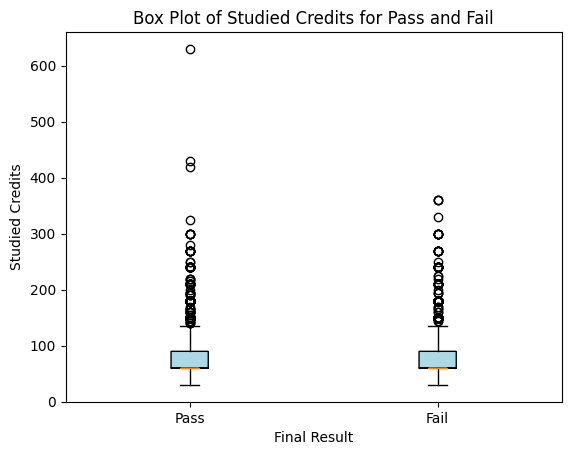

In [9]:
plt.boxplot([pass_credits, fail_credits], labels=['Pass', 'Fail'], notch=True, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Final Result')
plt.ylabel('Studied Credits')
plt.title('Box Plot of Studied Credits for Pass and Fail')
plt.show()


In [5]:
student_info = student_info[(student_info["final_result__"] != "Withdrawn") & (student_info["final_result__"] != "Distinction")]
student_info["final_result__"].value_counts()

final_result__
Pass    11507
Fail     6762
Name: count, dtype: int64

In [6]:
non_numeric_columns = student_info.select_dtypes(exclude=['number']).columns
non_numeric_columns = non_numeric_columns.tolist()
non_numeric_columns.remove('final_result__')
print(non_numeric_columns)

['gender__', 'region__', 'highest_education__', 'imd_band__', 'age_band__', 'disability__']


In [7]:
df_encoded = pd.get_dummies(student_info, columns=non_numeric_columns)
df_encoded.head(3)

,id_student__,num_of_prev_attempts__,studied_credits__,final_result__,assessment_type_AAA_2013J,assessment_type_AAA_2014J,assessment_type_BBB_2013B,assessment_type_BBB_2013J,assessment_type_BBB_2014B,assessment_type_BBB_2014J,...,imd_band___50-60%,imd_band___60-70%,imd_band___70-80%,imd_band___80-90%,imd_band___90-100%,age_band___0-35,age_band___35-55,age_band___55<=,disability___N,disability___Y
1,6516,0,60,Pass,0,5,0,0,0,0,...,False,False,False,True,False,False,False,True,True,False
4,11391,0,240,Pass,5,0,0,0,0,0,...,False,False,False,False,True,False,False,True,True,False
5,23629,2,60,Fail,0,0,4,0,0,0,...,False,False,False,False,False,True,False,False,True,False


In [8]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['final_result__'])
y = df_encoded['final_result__']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="binary", pos_label="Pass")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nClassifier: {name}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    results.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

results_df = pd.DataFrame(results)

print("\nResults DataFrame:")
print(results_df)


Classifier: Logistic Regression
Accuracy: 0.626984126984127
F1 Score: 0.7707317073170732

Classifier: Random Forest
Accuracy: 0.8669950738916257
F1 Score: 0.8994621431526686

Classifier: SVM
Accuracy: 0.626984126984127
F1 Score: 0.7707317073170732

Classifier: K-Nearest Neighbors
Accuracy: 0.5695128626163108
F1 Score: 0.6807387862796834

Results DataFrame:
            Classifier  Accuracy  F1 Score
0  Logistic Regression  0.626984  0.770732
1        Random Forest  0.866995  0.899462
2                  SVM  0.626984  0.770732
3  K-Nearest Neighbors  0.569513  0.680739


In [15]:
df_encoded['final_result__'].value_counts()

final_result__
Pass    11507
Fail     6762
Name: count, dtype: int64

In [16]:
from imblearn.combine import SMOTETomek
# Over-sampling using SMOTE and cleaning using Tomek links.
# Combine over- and under-sampling using SMOTE and Tomek links

X = df_encoded.drop(columns=['final_result__'])
y = df_encoded['final_result__']

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)

y_res.value_counts()

final_result__
Pass    9573
Fail    9573
Name: count, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="binary", pos_label="Pass")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nClassifier: {name}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    results.append({'Classifier': name, 'Accuracy': accuracy, 'F1 Score': f1})

results_df = pd.DataFrame(results)

print("\nResults DataFrame:")
print(results_df)



Classifier: Logistic Regression
Accuracy: 0.4906005221932115
F1 Score: 0.6582588894727623

Classifier: Random Forest
Accuracy: 0.8997389033942559
F1 Score: 0.9019407558733401

Classifier: SVM
Accuracy: 0.525065274151436
F1 Score: 0.5006862475981334

Classifier: K-Nearest Neighbors
Accuracy: 0.6409921671018277
F1 Score: 0.5994756772502186

Classifier: Decision Tree
Accuracy: 0.8519582245430809
F1 Score: 0.8470461289452387

Classifier: Gradient Boosting
Accuracy: 0.8955613577023499
F1 Score: 0.8971193415637859

Classifier: Naive Bayes
Accuracy: 0.5148825065274152
F1 Score: 0.0892156862745098

Results DataFrame:
            Classifier  Accuracy  F1 Score
0  Logistic Regression  0.490601  0.658259
1        Random Forest  0.899739  0.901941
2                  SVM  0.525065  0.500686
3  K-Nearest Neighbors  0.640992  0.599476
4        Decision Tree  0.851958  0.847046
5    Gradient Boosting  0.895561  0.897119
6          Naive Bayes  0.514883  0.089216


In [40]:
print(results_df)

            Classifier  Accuracy  F1 Score
0  Logistic Regression  0.490601  0.658259
1        Random Forest  0.899739  0.901941
2                  SVM  0.525065  0.500686
3  K-Nearest Neighbors  0.640992  0.599476
4        Decision Tree  0.851958  0.847046
5    Gradient Boosting  0.895561  0.897119
6          Naive Bayes  0.514883  0.089216


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Best Parameters:", accuracy)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.8984722907710918
Test Set Accuracy with Best Parameters: 0.9036553524804177


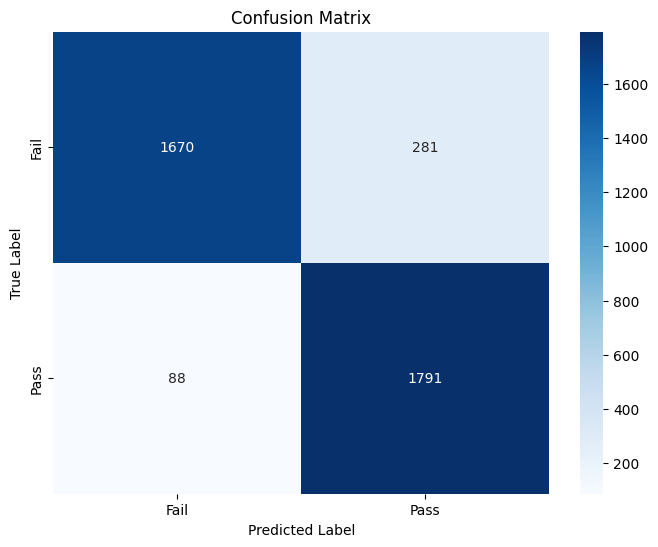

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładając, że masz X_test i y_test zdefiniowane wcześniej

# Predictions using the best random forest model
y_pred = best_rf_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Najważniejsze cechy:
                                       Feature  Importance
0                                 id_student__    0.034897
238  highest_education___A Level or Equivalent    0.023692
2                            studied_credits__    0.019724
239       highest_education___HE Qualification    0.011368
254                           age_band___35-55    0.009227
240     highest_education___Lower Than A Level    0.008702
173                            score_FFF_2013J    0.006729
253                            age_band___0-35    0.006616
223                                 gender___F    0.006541
28                              date_BBB_2013J    0.006334
1                       num_of_prev_attempts__    0.006296
219                           weight_FFF_2014J    0.006195
224                                 gender___M    0.005969
63                 date_registration_FFF_2013J    0.005594
107              date_unregistration_FFF_2013J    0.005566
204                           weigh

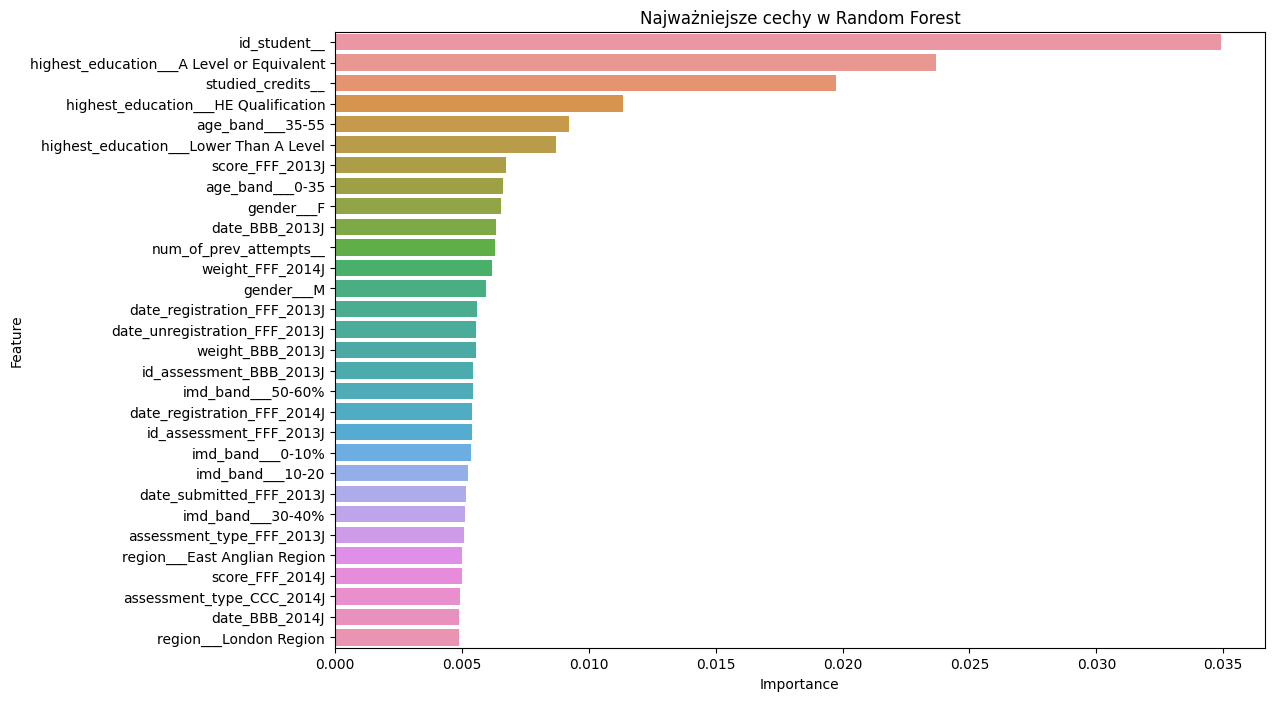

In [41]:
feature_importances = best_rf_model.feature_importances_

# Utworzenie DataFrame z nazwami cech i ich ważnościami
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sortowanie cech według ważności
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[:30]

# Wyświetlenie najważniejszych cech
print("Najważniejsze cechy:")
print(feature_importance_df)

# Wykres słupkowy ważności cech
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Najważniejsze cechy w Random Forest')
plt.show()

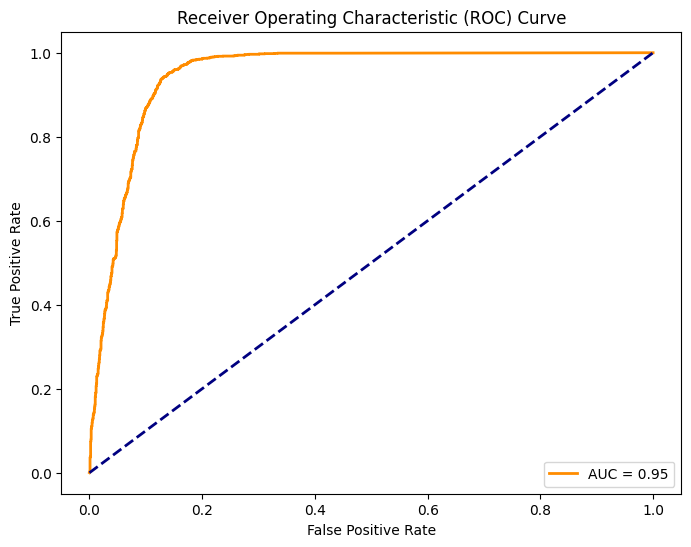

In [31]:
# Assuming y_test contains categorical labels 'Fail' and 'Pass'
y_test_binary = y_test.map({'Fail': 0, 'Pass': 1})

# Predict probabilities for the positive class
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC using binary labels
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [32]:
from sklearn.tree import export_graphviz
import graphviz

selected_tree = 0  # Zmień to na inny indeks, aby wybrać inne drzewo
tree = best_rf_model.estimators_[selected_tree]

# Eksportuj drzewo do pliku .dot
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True, max_depth=3)  # Adjust max_depth as needed
graph = graphviz.Source(dot_data)


In [33]:
graph.render('tree', format='png')

'tree.png'